# Projeto Robo de Sumo Simples
### Nivel de Dificuldade: Easy
### Comunity: BigRobot
#### Projetista: Juan Manoel


##### Componentes do Robo
* 1x  Arduino 
* 2x  Motores dc 6v 
* 1x  ponte H 5v 
* 1x  Sensor Ultrasonico 
* 1x  Sensor de IR(detectar Linha)7
* 8x  Pilhas recarregavel

###### Objetivo do Robo
--- 
- Um ponto de partida para quem quer competir em categoria de robo de Sumo. 

###### Software Nescessarios 
- IDE ARDUINO Atualizada 

### Circuito do Robo

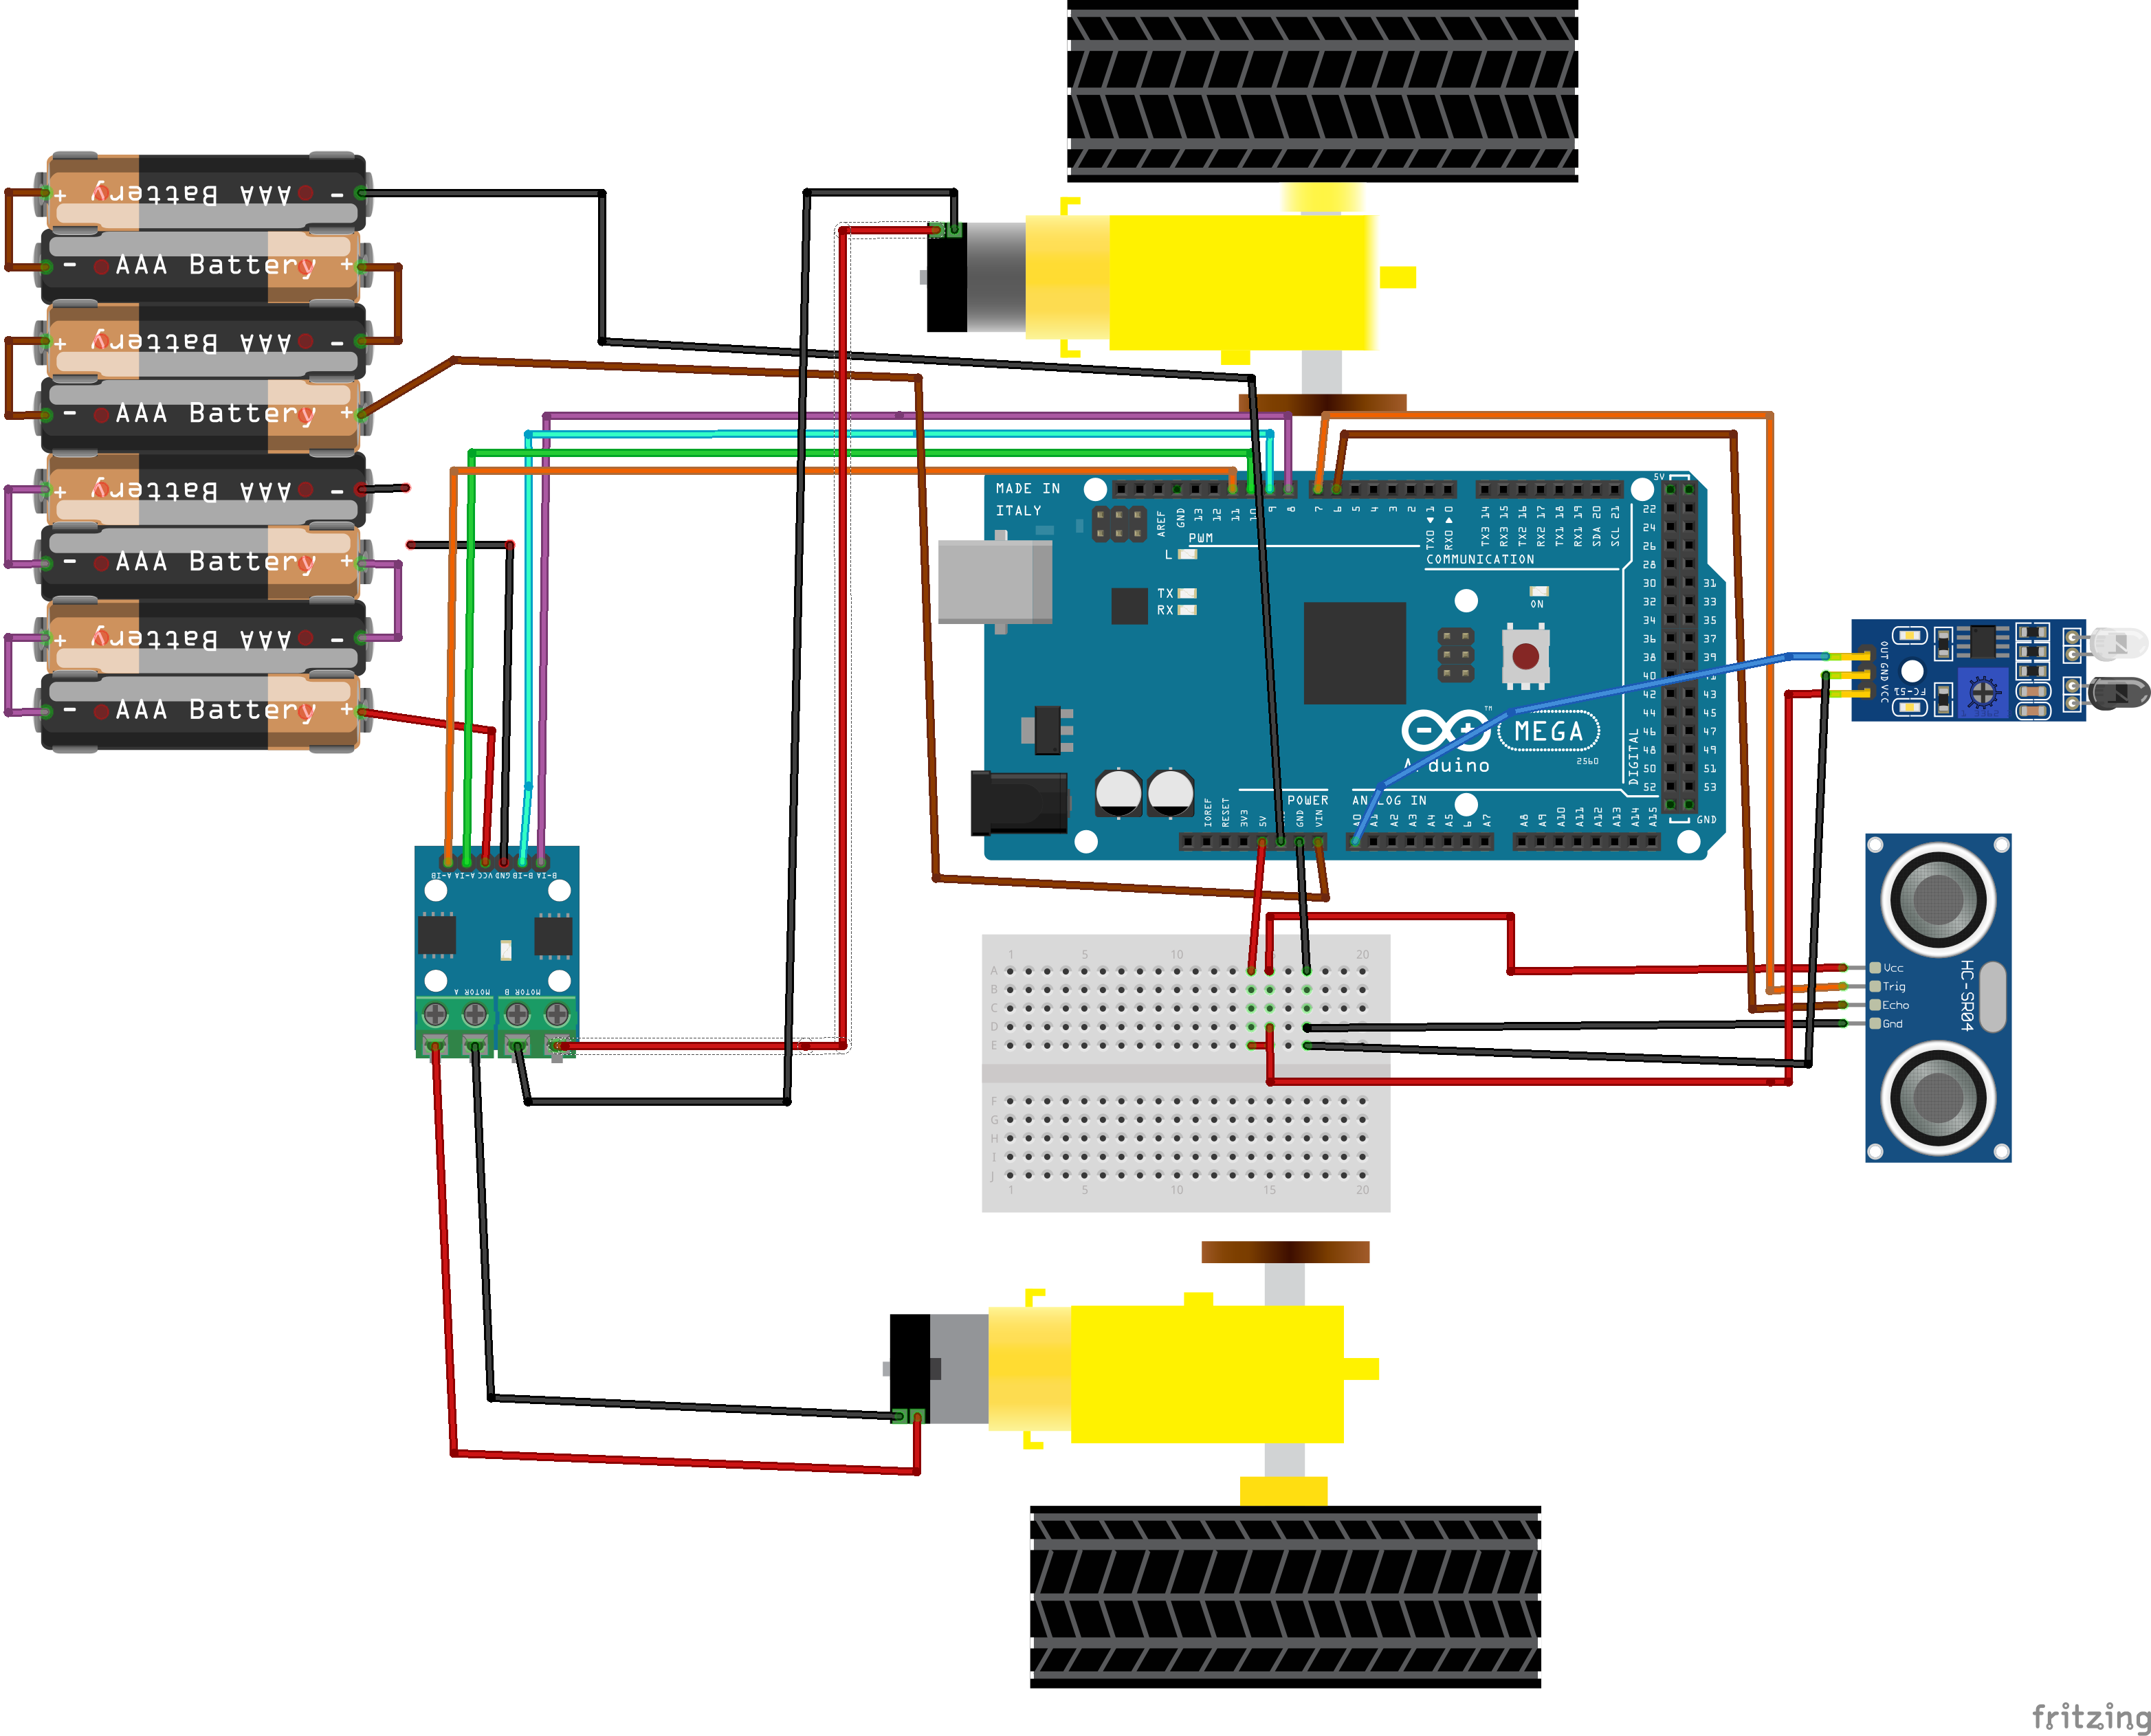

In [5]:
from IPython.display import Image
Image("roboSumoSimples_bb.png")

### PS: vale ressaltar que para ligar o arduino você deve usar uma bateria tipo power bank

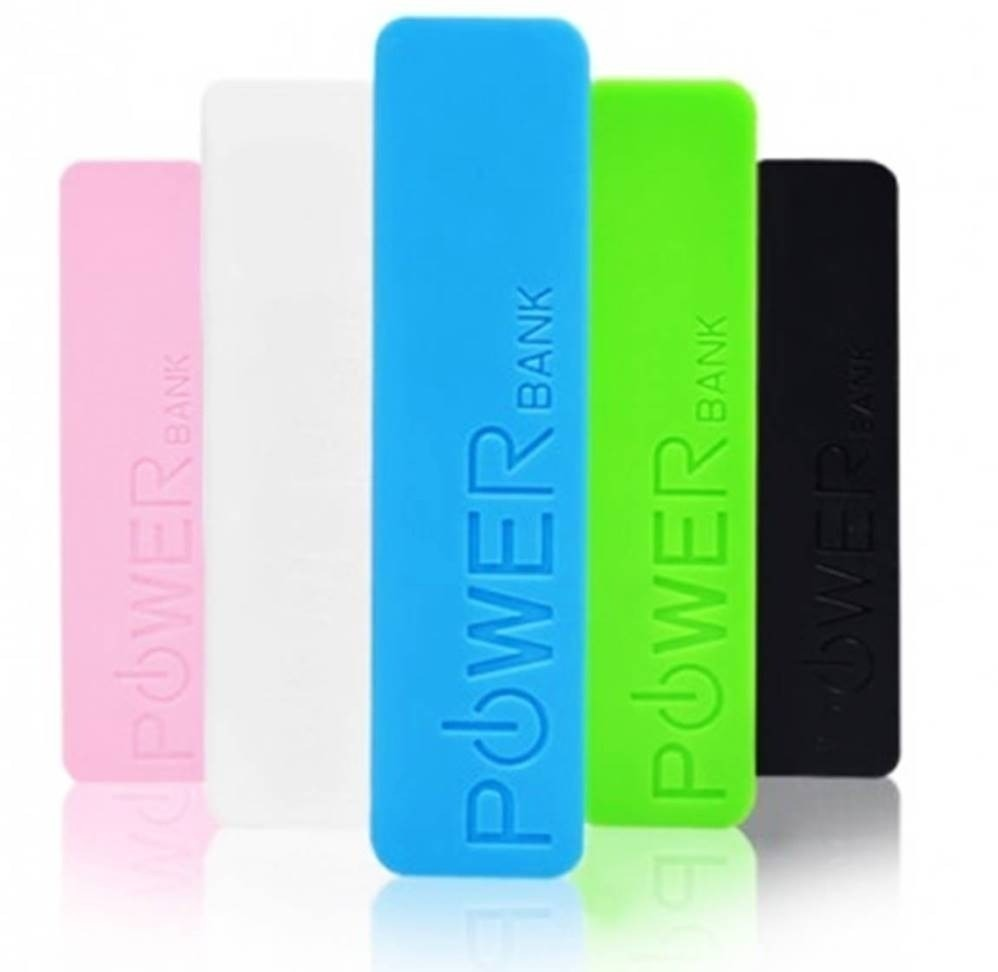

In [14]:
from IPython.display import Image
Image("powerbank.jpeg", width=330, height=330)

### Codigo do Arduino 
#### Usando a biblioteca de Ultrasonic
#### os Pinos de trigger 4 e echo 5 para pinos do sensor ultrasom
#### Para detectar a linha do circulo o pino 6 para receber os dados de HIGH e LOW, se receber HIGH ele anda e ao mesmo tempo o sensor de distancia tiver em uma distancia de 15 cm ele anda pra frente caso contrario usa um for para find o adiversario

#### void setup define os pinos dos motores 8,9,10,11
#### void loop roda o loop citado a cima 
#### void motor uma função para controle dos motores usando n


In [11]:
from os import popen
codigo = popen("cat RoboSumoSimples.ino").read()
print (codigo)

#include <Ultrasonic.h>


#define pino_trigger 4
#define pino_echo 5


Ultrasonic ultrasonic(pino_trigger, pino_echo);
#define Sensor_linha 6
bool linha;
int pinMotors[] = {8, 9, 10, 11}; 

void setup()
{
  Serial.begin(9600);
  pinMode(Sensor_linha, INPUT);
  for (int i = 0; i < sizeof(pinMotors); i++) {
    pinMode(pinMotors[i], OUTPUT);
  }
}

void loop()
{

  float cmMsec;
  long microsec = ultrasonic.timing();
  cmMsec = ultrasonic.convert(microsec, Ultrasonic::CM);

  Serial.print(cmMsec);

  linha = digitalRead(Sensor_linha);
   
  if ( linha == True && cmMsec == 15.0){
      Motor(255,255);
      delay(1000);
  } else {
    for (int i = 10; i < 200; i++) {
      Motor(i,i+5);
      if (cmMsec == 15.0){
         Motor(255,255);
         delay(1000);
				}
      }
  }

}

void Motor(int left, int right) {
  digitalWrite(pinMotors[0], left > 0 ? LOW : (left != 0 ? HIGH : LOW));
  analogWrite(pinMotors[1], left);
  digitalWrite(pinMotors[2], right > 0 ? LOW : (right != 0 ? HIGH : L